In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#Assigning a variable to the path each relevant csv file in prep for merge
edu_payload = ("Clean Education.csv")
migra_payload = ("Cleaned Demographics.csv")

education_df = pd.read_csv(edu_payload)
migration_df = pd.read_csv(migra_payload)

edumi_df = pd.merge(education_df, migration_df, how="outer", on=["countries and areas"])

In [3]:
#Taking essential columns
wshedmi = edumi_df[['countries and areas','Completion rate 2012–2018, Upper secondary education, male','Completion rate 2012–2018, Upper secondary education, female', 'Net migration rate (per 1,000 population) 2015−2020']]
wshedmi

,countries and areas,"Completion rate 2012–2018, Upper secondary education, male","Completion rate 2012–2018, Upper secondary education, female","Net migration rate (per 1,000 population) 2015−2020"
0,Afghanistan,32,14,-1.7
1,Albania,43,60,-4.9
2,Algeria,30,47,-0.2
3,Andorra,−,−,−
4,Angola,21,15,0.2
...,...,...,...,...
197,Venezuela (Bolivarian Republic of),−,−,-22.3
198,Viet Nam,50,61,-0.8
199,Yemen,37,23,-1.1
200,Zambia,34,23,-0.5


In [4]:
# get rid of "-" that are supposed to be NA
wshedmi.loc[:,('Completion rate 2012–2018, Upper secondary education, male')] = wshedmi['Completion rate 2012–2018, Upper secondary education, male'].apply(lambda x: x.replace('−',''))
wshedmi.loc[:,('Completion rate 2012–2018, Upper secondary education, female')] = wshedmi['Completion rate 2012–2018, Upper secondary education, female'].apply(lambda x: x.replace('−',''))
wshedmi.loc[:,('Net migration rate (per 1,000 population) 2015−2020')] = wshedmi['Net migration rate (per 1,000 population) 2015−2020'].apply(lambda x: x.replace('−',''))

# chech it was taken out
wshedmi

# save as csv so that we can drop the NAs
wshedmi.to_csv("Education and Migration.csv", encoding='utf-8', index=False)

/Users/Mac/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [16]:
# import merged and cleaned data
ed_mig = pd.read_csv("Education and Migration.csv")

#drop blank rows
ed_mig = ed_mig.dropna(how="any")

# print new data
ed_mig.head(30)

,countries and areas,"Completion rate 2012–2018, Upper secondary education, male","Completion rate 2012–2018, Upper secondary education, female","Net migration rate (per 1,000 population) 2015−2020"
0,Afghanistan,32.0,14.0,-1.7
1,Albania,43.0,60.0,-4.9
2,Algeria,30.0,47.0,-0.2
4,Angola,21.0,15.0,0.2
7,Argentina,53.0,66.0,0.1
8,Armenia,91.0,96.0,-1.7
14,Bangladesh,31.0,26.0,-2.3
15,Barbados,91.0,97.0,-0.3
16,Belarus,96.0,98.0,0.9
18,Belize,20.0,25.0,3.2


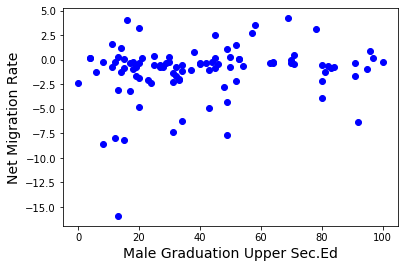

In [19]:
uedm = ed_mig['Completion rate 2012–2018, Upper secondary education, male']
uedf = ed_mig['Completion rate 2012–2018, Upper secondary education, female']
rofm = ed_mig['Net migration rate (per 1,000 population) 2015−2020']
plt.scatter(uedm,rofm, color="blue", label = ("Male Grad Rate vs Migration Rate"));
plt.xlabel('Male Graduation Upper Sec.Ed',fontsize=14)
plt.ylabel('Net Migration Rate',fontsize=14);

The r-squared is: 0.16881582302977693


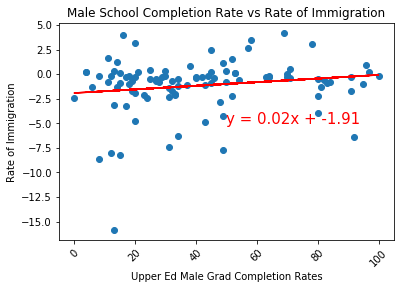

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(uedm,rofm)
regress_values = uedm * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(uedm, rofm)
plt.plot(uedm,regress_values,"r-")
plt.annotate(line_eq,(50,-5),fontsize=15,color="red")
plt.xticks(rotation=45)
plt.title("Male School Completion Rate vs Rate of Immigration")
plt.xlabel("Upper Ed Male Grad Completion Rates")
plt.ylabel("Rate of Immigration")
print(f"The r-squared is: {rvalue}")
plt.savefig('Male Upper Ed Completion vs Rate of Immigration.png')

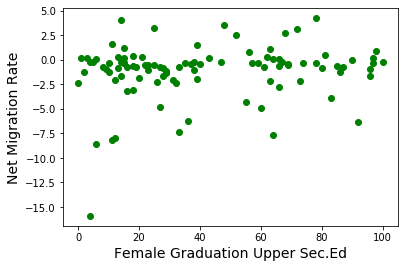

In [22]:
plt.scatter(uedf,rofm, color="green", label = ("Female Grad Rate vs Migration Rate"));
plt.xlabel('Female Graduation Upper Sec.Ed',fontsize=14)
plt.ylabel('Net Migration Rate',fontsize=14);

The r-squared is: 0.15089963217593624


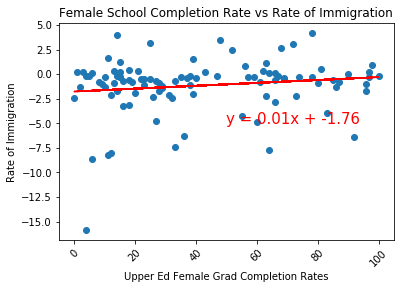

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(uedf,rofm)
regress_values = uedf * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(uedf, rofm)
plt.plot(uedf,regress_values,"r-")
plt.annotate(line_eq,(50,-5),fontsize=15,color="red")
plt.xticks(rotation=45)
plt.title("Female School Completion Rate vs Rate of Immigration")
plt.xlabel("Upper Ed Female Grad Completion Rates")
plt.ylabel("Rate of Immigration")
print(f"The r-squared is: {rvalue}")
plt.savefig('Female Upper Ed Completion vs Rate of Immigration.png')

In [40]:
uedm10

,countries and areas,"Completion rate 2012–2018, Upper secondary education, male","Completion rate 2012–2018, Upper secondary education, female","Net migration rate (per 1,000 population) 2015−2020"
48,Democratic People's Republic of Korea,100.0,100.0,-0.2
189,Ukraine,97.0,97.0,0.2
16,Belarus,96.0,98.0,0.9
91,Kazakhstan,95.0,96.0,-1.0
22,Bosnia and Herzegovina,92.0,92.0,-6.4
8,Armenia,91.0,96.0,-1.7
15,Barbados,91.0,97.0,-0.3
118,Montenegro,84.0,87.0,-0.8
185,Turkmenistan,83.0,80.0,-0.9
95,Kyrgyzstan,82.0,85.0,-0.6


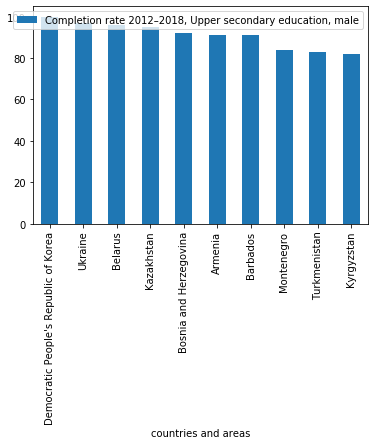

<Figure size 432x288 with 0 Axes>

In [49]:
udem_country = uedm10[['countries and areas','Completion rate 2012–2018, Upper secondary education, male']]
udem_country.plot(x ='countries and areas', y='Completion rate 2012–2018, Upper secondary education, male', kind = 'bar')
plt.title = ('Male Upper Ed Completion Per Top 10')
plt.show()
plt.savefig('Male Upper Ed Completion Per Top 10.png')

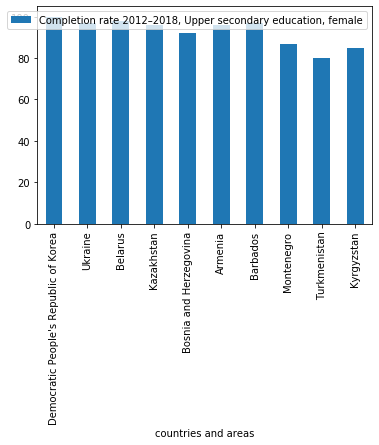

<Figure size 432x288 with 0 Axes>

In [50]:
udem_country = uedm10[['countries and areas','Completion rate 2012–2018, Upper secondary education, female']]
udem_country.plot(x ='countries and areas', y='Completion rate 2012–2018, Upper secondary education, female', kind = 'bar')
plt.title = ('Female Upper Ed Completion Per Top 10')
plt.show()
plt.savefig('Female Upper Ed Completion Per Top 10.png')